In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz 
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pydotplus
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

In [271]:
decision_tree = pd.read_csv("decision_tree.csv")

In [272]:
decision_tree.shape

(5400, 6)

In [231]:
decision_tree.head()

,Base_Price,Net_Price,Promo_Price,Bid_Price,Popularity,Product_Cluster
0,5.672116,30.741031,45.810503,3.465861,12.156347,Cluster_0
1,31.806780,1.360780,48.103029,24.615243,0.899580,Cluster_0
2,9.373347,6.315181,36.489786,32.135478,9.256487,Cluster_0
3,15.575193,24.013114,59.997814,30.909349,47.892860,Cluster_0
4,66.521156,22.917005,35.792860,2.816921,50.594867,Cluster_0


In [232]:
decision_tree['Product_Cluster'].value_counts()

Cluster_2    1350
Cluster_0    1350
Cluster_3    1350
Cluster_1    1350
Name: Product_Cluster, dtype: int64

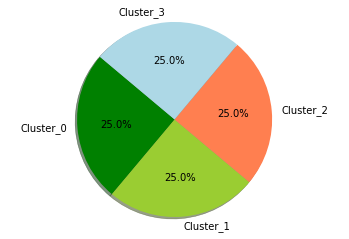

In [263]:
labels = 'Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3'
sizes = [decision_tree.Product_Cluster.value_counts()[0], decision_tree.Product_Cluster.value_counts()[1],decision_tree.Product_Cluster.value_counts()[2],decision_tree.Product_Cluster.value_counts()[3]]
colors = ['green', 'yellowgreen', 'coral', 'lightblue']
explode = (0, 0, 0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

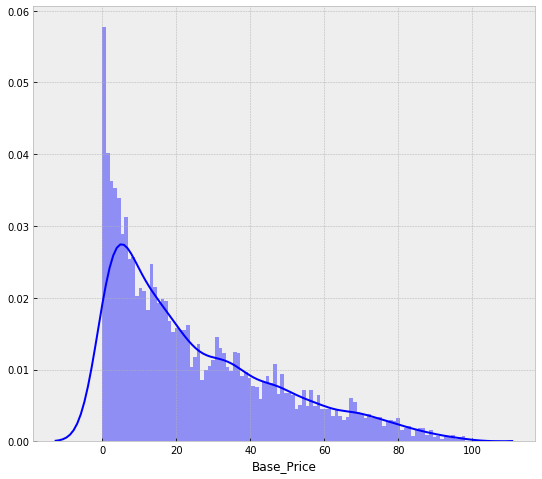

In [233]:
# Check and visualize the distributions for base price
plt.figure(figsize=(9, 8))
sns.distplot(decision_tree['Base_Price'], color='b', bins=100, hist_kws={'alpha': 0.4});

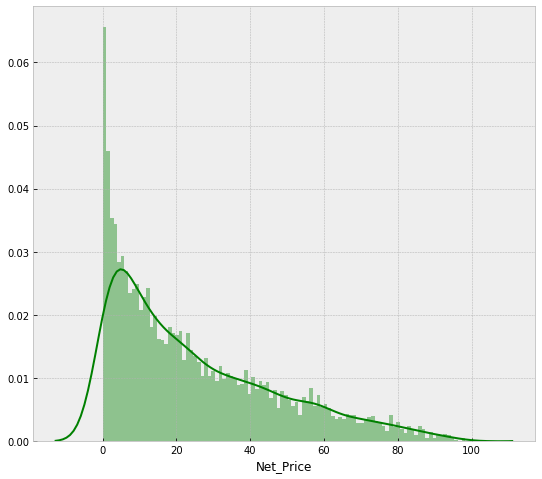

In [234]:
# Check and visualize the distributions for net price
plt.figure(figsize=(9, 8))
sns.distplot(decision_tree['Net_Price'], color='g', bins=100, hist_kws={'alpha': 0.4});

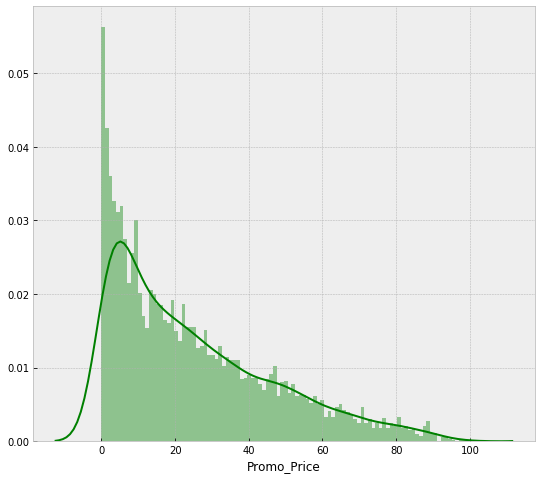

In [235]:
# Check and visualize the distributions for promo price
plt.figure(figsize=(9, 8))
sns.distplot(decision_tree['Promo_Price'], color='g', bins=100, hist_kws={'alpha': 0.4});

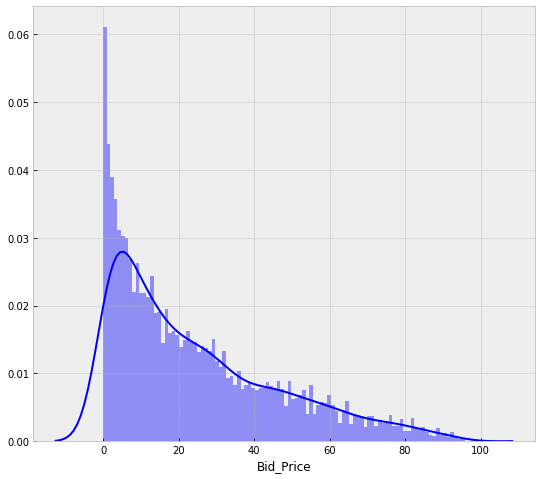

In [236]:
# Check and visualize the distributions for bid price
plt.figure(figsize=(9, 8))
sns.distplot(decision_tree['Bid_Price'], color='b', bins=100, hist_kws={'alpha': 0.4});

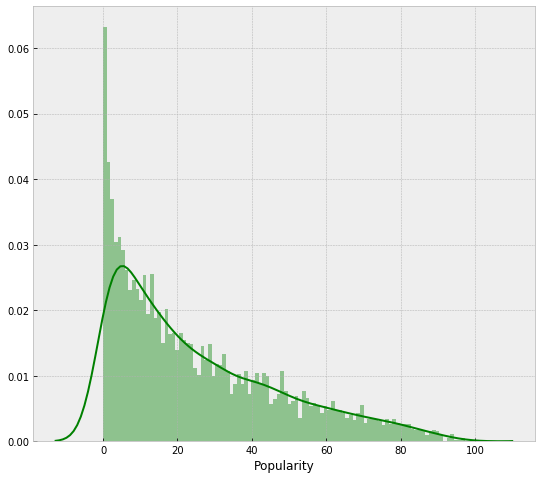

In [237]:
# Check and visualize the distributions for Popularity
plt.figure(figsize=(9, 8))
sns.distplot(decision_tree['Popularity'], color='g', bins=100, hist_kws={'alpha': 0.4});

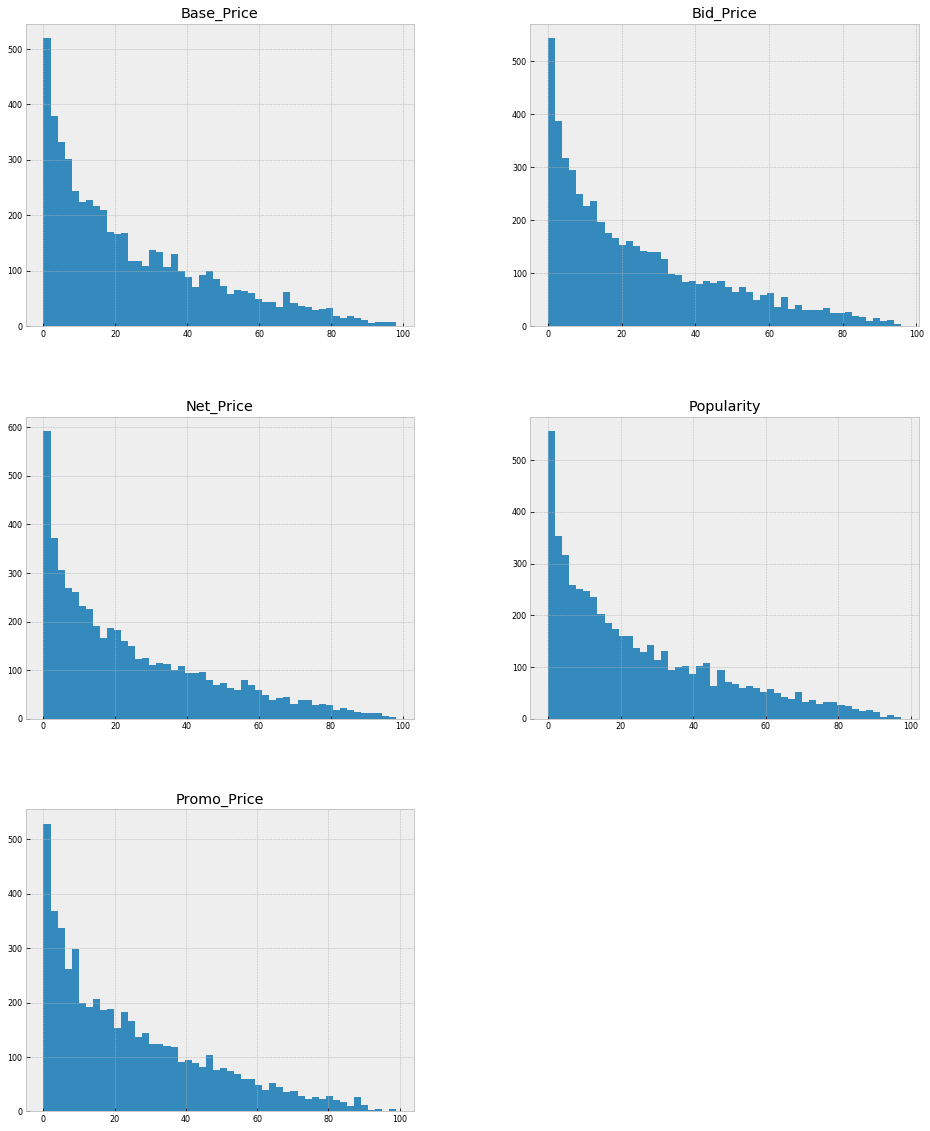

In [238]:
decision_tree.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

{'boxes': [<matplotlib.lines.Line2D at 0x1a1c65a278>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1c65a828>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c661e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c661828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1c65a748>,
  <matplotlib.lines.Line2D at 0x1a1c65acc0>]}

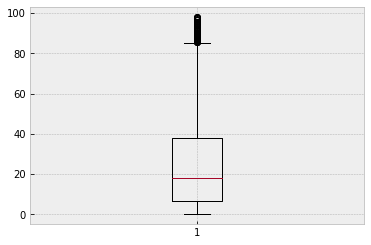

In [27]:
plt.boxplot(decision_tree["Base_Price"])

{'boxes': [<matplotlib.lines.Line2D at 0x1a1b954eb8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1b9669e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c135748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c135128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1b954dd8>,
  <matplotlib.lines.Line2D at 0x1a1b966438>]}

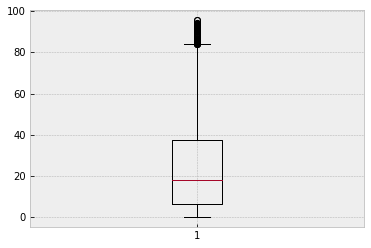

In [28]:
plt.boxplot(decision_tree["Bid_Price"])

{'boxes': [<matplotlib.lines.Line2D at 0x10bdf2390>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1b996c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b977748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1b977f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1b996e80>,
  <matplotlib.lines.Line2D at 0x1a1b996390>]}

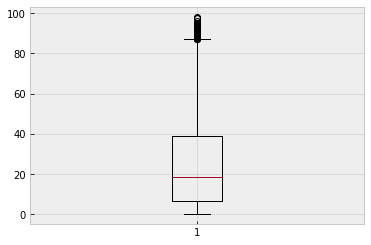

In [29]:
plt.boxplot(decision_tree["Net_Price"])

{'boxes': [<matplotlib.lines.Line2D at 0x1a1bf2b3c8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1be63f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1be63518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1be63b00>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1bf2b208>,
  <matplotlib.lines.Line2D at 0x1a1bf2bf60>]}

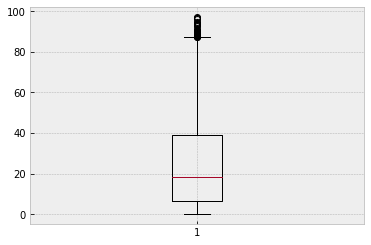

In [30]:
plt.boxplot(decision_tree["Popularity"])

{'boxes': [<matplotlib.lines.Line2D at 0x1a1c3193c8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1c2facc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c1ab6d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c2fa080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1c319898>,
  <matplotlib.lines.Line2D at 0x1a1c2c9b00>]}

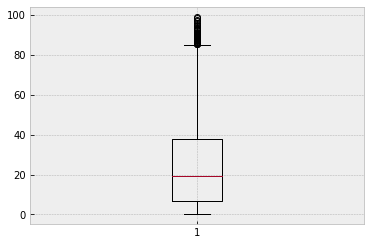

In [31]:
plt.boxplot(decision_tree["Promo_Price"])

In [265]:
decision_tree.describe()

,Base_Price,Net_Price,Promo_Price,Bid_Price,Popularity
count,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,25.001075,25.007264,24.961747,24.577100,25.220876
std,22.213849,22.363601,21.806739,22.020764,22.365002
min,0.000371,0.003576,0.002314,0.000855,0.004298
25%,6.609173,6.489905,6.730222,6.385209,6.697554
50%,18.270308,18.561333,19.101713,18.117013,18.638816
75%,38.115805,38.753039,37.992092,37.483784,38.923922
max,98.182187,98.272258,99.080434,95.839907,97.269631


In [91]:
corr = decision_tree.corr()

In [90]:
corr

,Base_Price,Net_Price,Promo_Price,Bid_Price,Popularity
Base_Price,1.000000,0.003548,0.005603,-0.005899,-0.009158
Net_Price,0.003548,1.000000,-0.007147,0.012389,0.005119
Promo_Price,0.005603,-0.007147,1.000000,-0.019296,-0.004629
Bid_Price,-0.005899,0.012389,-0.019296,1.000000,0.004567
Popularity,-0.009158,0.005119,-0.004629,0.004567,1.000000


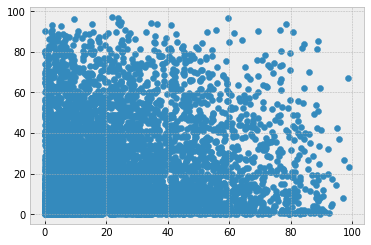

In [269]:
plt.scatter(decision_tree.Promo_Price, decision_tree.Popularity);

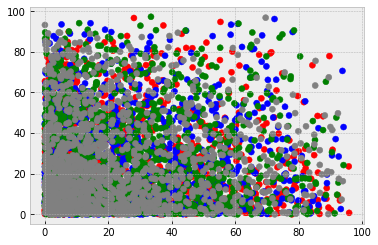

In [320]:
color_map = {'Cluster_0': 'red', 'Cluster_1': 'blue',  'Cluster_2': 'green',  'Cluster_3': 'grey'}
ax = plt.subplot()
x, y = decision_tree.Bid_Price, decision_tree.Popularity
colors = decision_tree.Product_Cluster.map(color_map)
ax.scatter(x, y, color=colors)

In [273]:
independent_var = decision_tree.drop('Product_Cluster', axis=1)  

In [274]:
target_var = decision_tree['Product_Cluster']  

In [275]:
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20)  

In [276]:
classifier = DecisionTreeClassifier()  

In [277]:
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [225]:
y_pred_train = classifier.predict(X_train)  

In [224]:
print(confusion_matrix(y_train, y_pred_train))  

[[275 283 278 262]
 [261 273 272 266]
 [304 250 265 268]
 [258 263 253 289]]


In [223]:
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.2550925925925926

In [182]:
y_pred_test = classifier.predict(X_test)  

In [183]:
print(confusion_matrix(y_test, y_pred_test))  

[[67 64 61 69]
 [78 70 71 63]
 [66 75 77 63]
 [69 57 68 62]]


In [184]:
print(classification_report(y_test, y_pred_test))  

             precision    recall  f1-score   support

  Cluster_0       0.24      0.26      0.25       261
  Cluster_1       0.26      0.25      0.26       282
  Cluster_2       0.28      0.27      0.28       281
  Cluster_3       0.24      0.24      0.24       256

avg / total       0.26      0.26      0.26      1080



In [73]:
dot_data = tree.export_graphviz(classifier, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("decision_tree") 

'decision_tree.pdf'

In [80]:
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=independent_var.columns,  
                         class_names=decision_tree.Product_Cluster,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 

In [185]:
accuracy = accuracy_score(y_test, y_pred_test)
accuracy

0.25555555555555554

In [ ]:
# Trying to improve the accuracy of the Decision Tree here

In [219]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)

In [220]:
clf = clf.fit(X_train, y_train)

In [221]:
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(X_train,y_train,clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.277 



In [82]:
#Creating Random Forest here

In [278]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [279]:
y_pred_train = rf_classifier.predict(X_train)  

In [280]:
print(classification_report(y_train, y_pred_train))  

             precision    recall  f1-score   support

  Cluster_0       0.98      0.99      0.99      1092
  Cluster_1       0.98      0.99      0.99      1083
  Cluster_2       0.99      0.98      0.99      1049
  Cluster_3       1.00      0.98      0.99      1096

avg / total       0.99      0.99      0.99      4320



In [281]:
y_pred_test = rf_classifier.predict(X_test)  

In [282]:
print(classification_report(y_test, y_pred_test))  

             precision    recall  f1-score   support

  Cluster_0       0.28      0.36      0.32       258
  Cluster_1       0.27      0.32      0.29       267
  Cluster_2       0.28      0.20      0.23       301
  Cluster_3       0.22      0.19      0.21       254

avg / total       0.26      0.27      0.26      1080



In [283]:
accuracy = accuracy_score(y_test, y_pred_test)
accuracy

0.2657407407407407

# The Second Data Set

In [285]:
cross_01_1000rows_5gap = pd.read_csv("cross_01_1000rows_5gap.csv")

In [286]:
cross_01_1000rows_5gap['CATEGORY'].value_counts()

A    534
B    466
Name: CATEGORY, dtype: int64

In [289]:
cross_01_1000rows_5gap.shape

(1000, 3)

In [290]:
cross_01_1000rows_5gap.head()

,X,Y,CATEGORY
0,36.0,94.8,A
1,2.9,44.7,B
2,71.9,85.4,B
3,7.7,67.7,A
4,9.5,84.4,A


In [105]:
cross_01_1000rows_5gap.describe()

,X,Y
count,1000.000000,1000.000000
mean,48.547700,48.664500
std,30.154004,30.078214
min,0.000000,0.000000
25%,22.025000,21.950000
50%,43.900000,44.000000
75%,75.350000,75.100000
max,99.900000,99.900000


In [107]:
cross_01_1000rows_5gap.corr()

,X,Y
X,1.000000,-0.047383
Y,-0.047383,1.000000


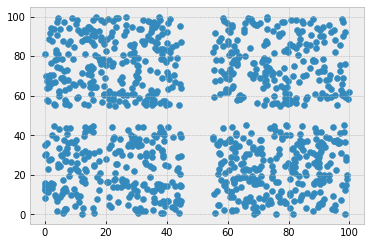

In [240]:
plt.scatter(cross_01_1000rows_5gap.X, cross_01_1000rows_5gap.Y);

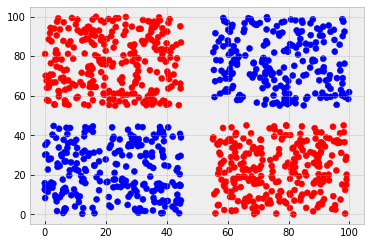

In [241]:
color_map = {'A': 'red', 'B': 'blue'}
ax = plt.subplot()
x, y = cross_01_1000rows_5gap.X, cross_01_1000rows_5gap.Y
colors = cross_01_1000rows_5gap.CATEGORY.map(color_map)
ax.scatter(x, y, color=colors)

In [291]:
independent_var = cross_01_1000rows_5gap.drop('CATEGORY', axis=1)  

In [292]:
target_var = cross_01_1000rows_5gap['CATEGORY']  

In [293]:
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20)

In [294]:
classifier = DecisionTreeClassifier()  

In [295]:
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [296]:
y_pred_train = classifier.predict(X_train)  

In [248]:
print(classification_report(y_train, y_pred_train))  

             precision    recall  f1-score   support

          A       1.00      1.00      1.00       427
          B       1.00      1.00      1.00       373

avg / total       1.00      1.00      1.00       800



In [297]:
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

1.0

In [249]:
y_pred_test = classifier.predict(X_test)  

In [250]:
print(classification_report(y_test, y_pred_test))  

             precision    recall  f1-score   support

          A       1.00      0.98      0.99       107
          B       0.98      1.00      0.99        93

avg / total       0.99      0.99      0.99       200



In [251]:
accuracy = accuracy_score(y_test, y_pred_test)
accuracy

0.99

# The Third One is done here

In [299]:
diagonal_01_1000rows_5gap = pd.read_csv("diagonal_01_1000rows_5gap.csv")

In [300]:
diagonal_01_1000rows_5gap.head()

,X,Y,CATEGORY
0,36.0,94.8,B
1,2.9,44.7,A
2,51.5,5.3,B
3,49.1,76.1,B
4,71.9,85.4,B


In [254]:
diagonal_01_1000rows_5gap['CATEGORY'].value_counts()

B    500
A    500
Name: CATEGORY, dtype: int64

In [255]:
diagonal_01_1000rows_5gap.describe()

,X,Y
count,1000.000000,1000.000000
mean,48.318200,48.607300
std,28.578965,28.778099
min,0.000000,0.000000
25%,24.700000,23.350000
50%,47.700000,49.150000
75%,72.700000,72.350000
max,99.900000,99.900000


In [256]:
diagonal_01_1000rows_5gap.corr()

,X,Y
X,1.000000,-0.051472
Y,-0.051472,1.000000


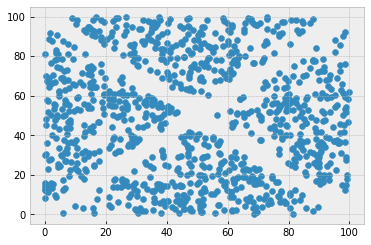

In [257]:
plt.scatter(diagonal_01_1000rows_5gap.X, diagonal_01_1000rows_5gap.Y);

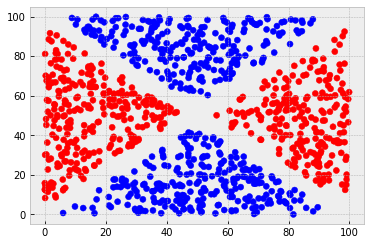

In [258]:
color_map = {'A': 'red', 'B': 'blue'}
ax = plt.subplot()
x, y = diagonal_01_1000rows_5gap.X, diagonal_01_1000rows_5gap.Y
colors = diagonal_01_1000rows_5gap.CATEGORY.map(color_map)
ax.scatter(x, y, color=colors)

In [301]:
independent_var = diagonal_01_1000rows_5gap.drop('CATEGORY', axis=1)  
target_var = diagonal_01_1000rows_5gap['CATEGORY']  
X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.20)  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)  
y_pred_train = classifier.predict(X_train)  
print(classification_report(y_train, y_pred_train))  
y_pred_test = classifier.predict(X_test)  
print(classification_report(y_test, y_pred_test))  

             precision    recall  f1-score   support

          A       1.00      1.00      1.00       391
          B       1.00      1.00      1.00       409

avg / total       1.00      1.00      1.00       800

             precision    recall  f1-score   support

          A       0.97      0.98      0.98       109
          B       0.98      0.97      0.97        91

avg / total       0.98      0.97      0.97       200



In [302]:
print(classification_report(y_test, y_pred_test))  

             precision    recall  f1-score   support

          A       0.97      0.98      0.98       109
          B       0.98      0.97      0.97        91

avg / total       0.98      0.97      0.97       200

